# Transfer Learning Usin CNN (VGG16)
[Nachiketa Hebbar](https://www.youtube.com/watch?v=lHM458ZsfkM)

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
# !mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod +600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 99% 321M/325M [00:07<00:00, 49.4MB/s]
100% 325M/325M [00:07<00:00, 45.7MB/s]


In [ ]:
!unzip skin-cancer-malignant-vs-benign.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/benign/420.jpg  
  inflating: data/train/benign/421.jpg  
  inflating: data/train/benign/422.jpg  
  inflating: data/train/benign/423.jpg  
  inflating: data/train/benign/424.jpg  
  inflating: data/train/benign/425.jpg  
  inflating: data/train/benign/426.jpg  
  inflating: data/train/benign/429.jpg  
  inflating: data/train/benign/43.jpg  
  inflating: data/train/benign/430.jpg  
  inflating: data/train/benign/431.jpg  
  inflating: data/train/benign/432.jpg  
  inflating: data/train/benign/434.jpg  
  inflating: data/train/benign/435.jpg  
  inflating: data/train/benign/438.jpg  
  inflating: data/train/benign/439.jpg  
  inflating: data/train/benign/440.jpg  
  inflating: data/train/benign/441.jpg  
  inflating: data/train/benign/442.jpg  
  inflating: data/train/benign/443.jpg  
  inflating: data/train/benign/445.jpg  
  inflating: data/train/benign/446.jpg  
  inflating: data/train/benign/447.jpg  
  infla

In [ ]:
!ls

data	     sample_data			  test
kaggle.json  skin-cancer-malignant-vs-benign.zip  train


In [ ]:
train_path = "train"
test_path = "test"

Working with 1440 images
Image examples: 
1750.jpg


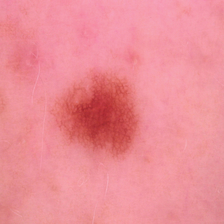

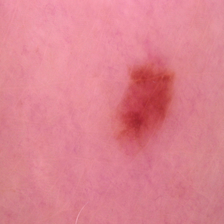

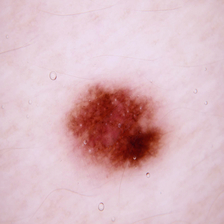

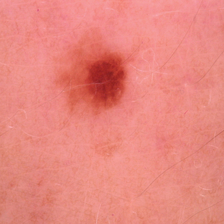

937.jpg
1406.jpg
787.jpg
779.jpg


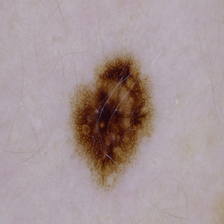

1287.jpg


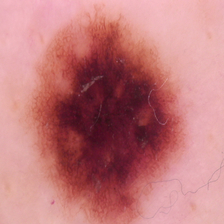

980.jpg


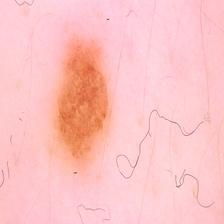

372.jpg


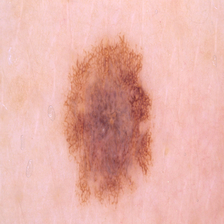

1168.jpg


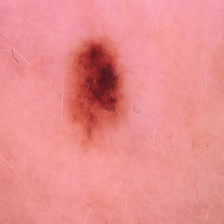

1752.jpg


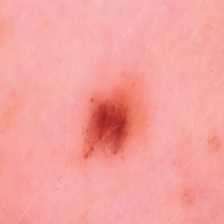

In [ ]:
from PIL import Image
import os
from IPython.display import display
from IPython.display import Image as _Imgdis

# Creating an objects
folder_benign = train_path + '/benign'

onlybenignfiles = [f for f in os.listdir(folder_benign) if os.path.isfile(os.path.join(folder_benign, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")

for i in range(10):
  print(onlybenignfiles[i])
  display(_Imgdis(filename=folder_benign + "/" + onlybenignfiles[i], width=240, height=240))

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
folders = glob("train/*")
print(len(folders))

2


In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers 

adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 2637 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_path,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 660 images belonging to 2 classes.


In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                             verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history = model.fit(
    train_set,
    validation_data = test_set,
    epochs=50,
    steps_per_epoch = 5,
    validation_steps=32,
    callbacks=callbacks, verbose=2
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10

Epoch 00001: val_loss improved from inf to 2.77993, saving model to mymodel.h5
5/5 - 466s - loss: 3.1523 - accuracy: 0.5813 - val_loss: 2.7799 - val_accuracy: 0.7470 - 466s/epoch - 93s/step
Epoch 2/10
5/5 - 81s - loss: 1.8826 - accuracy: 0.7688 - 81s/epoch - 16s/step
Epoch 3/10
5/5 - 81s - loss: 1.9291 - accuracy: 0.8313 - 81s/epoch - 16s/step
Epoch 4/10
5/5 - 81s - loss: 1.3328 - accuracy: 0.8313 - 81s/epoch - 16s/step
Epoch 5/10
5/5 - 81s - loss: 1.5226 - accuracy: 0.8313 - 81s/epoch - 16s/step
Epoch 6/10
5/5 - 81s - loss: 1.9318 - accuracy: 0.7937 - 81s/epoch - 16s/step
Epoch 7/10
5/5 - 81s - loss: 1.5273 - accuracy: 0.8188 - 81s/epoch - 16s/step
Epoch 8/10
5/5 - 81s - loss: 2.2346 - accuracy: 0.7688 - 81s/epoch - 16s/step
Epoch 9/10
5/5 - 81s - loss: 2.2432 - accuracy: 0.7812 - 81s/epoch - 16s/step
Epoch 10/10
5/5 - 81s - loss: 1.5711 - accuracy: 0.8375 - 81s/epoch - 16s/step
Training completed in time:  0:20:34.639511


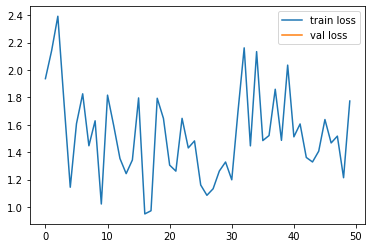

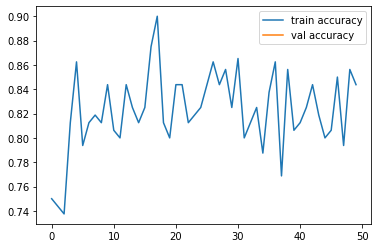

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig("LoassVal_loss")

# Plotting accuracies
plt.plot(model_history.history['accuracy'], label='train accuracy')
plt.plot(model_history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig("AccVal_acc")